# Recurrent Neural Network (RNN)

RNN is a special kind of neural network that allows us capturing temporal dynamic behavior. 
  
![](https://miro.medium.com/max/724/1*dp-NFSRVZCvvldrhnZaQow.png)

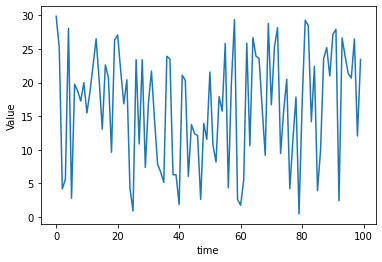

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler

def generate_sequence(length):                         ## Generate a seqeunce of numbers 
    return np.array([round(random.uniform(0, 30), 2) for i in range(length)])

def create_dataset(dataset, time_step):                     ## Build training data X and Y   
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step)]        
        dataX.append(a)
        dataY.append(dataset[i + time_step])
    return np.array(dataX), np.array(dataY)

def normalize_data(data):
    scaler = MinMaxScaler()
    data = np.reshape(data, (-1, 1))
    scaled_data = scaler.fit_transform(data)                      ## normalize data (0 - 1) 
    return scaled_data.reshape(-1)

data = generate_sequence(100)                   
plt.ylabel('Value')
plt.xlabel('time')
plt.plot(data)

## RNN architectures 

![](https://static.javatpoint.com/tutorial/tensorflow/images/tensorflow-types-of-rnn.png)

Given a sequence of data X = <x(1), x(2), x(3)..x(t),.., x(T)> be a T-length sequence where t is time step.

One-to-One model

           y(t) = f(x(t))               

Many-to-One model 

           y(t) = f(x(t), x(t-1), x(t-2)) 
           
Many-to-Many model

           y(t), y(t+1), y(t+2) = f(x(t), x(t-1), x(t-2)) 

One-to-Many model 

           y(t), y(t+1), y(t+2) = f(x(t)) 
           

# One-to-One RNN 

## Generate dataset with time-step 

In [4]:
time_step = 1                                                          ## time step = 1 
norm_data = normalize_data(data)                                               
X, Y = create_dataset(norm_data, time_step)                            ## y(t) = f(x(t))
print('X\'s shape = ', X.shape,' Y\'s shape = ', Y.shape)

X's shape =  (98, 1)  Y's shape =  (98,)


# Reshape input data [samples, time step, n_feature] 

In [6]:
# reshape X to be [samples, time steps, features]
time_step = 1
print('Before X\'s reshape: ', X.shape)
X = np.reshape(X, (98, 1, 1))                 ## [samples, time_step, feature]      
print('After X\'s reshape: ', X.shape)

Before X's reshape:  (98, 1, 1)
After X's reshape:  (98, 1, 1)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 10)                390       
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________
None


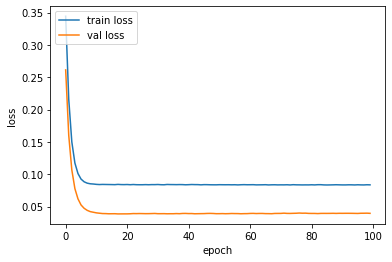

In [8]:
# One-to-One Model 
from keras.models import Sequential
from keras.layers import GRU, Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

####################### Define GRU #######################################################
model = Sequential()
model.add(GRU(10, input_shape=(1 , 1)))                                 # input_shape = (time_step, feature)
model.add(Dense(1))                                                     # output y 

model.compile(loss='mean_squared_error', optimizer='sgd')
print(model.summary())
#########################  Training ######################################################

history = model.fit(X_train, Y_train, validation_split = 0.1, batch_size=8, epochs=100, verbose=0)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'val loss'], loc='upper left')
plt.show()

In [9]:
# Test model 
loss = model.evaluate(X_test, Y_test)
print('test loss = ', loss)

x_test = X_test[1]
x_test = x_test.reshape(1, x_test.shape[0], x_test.shape[1])   ## reshape input from 2D to 3D 

predicted_y = model.predict(x_test)

print('input : ', x_test.reshape(-1))
print('Predict output : ', predicted_y.reshape(-1))
print('Actual Output: ', Y_test[1])    

1/1 [==============================] - 0s 20ms/step - loss: 0.0996
test loss =  0.09958979487419128
input :  [0.89051343]
Predict output :  [0.55022067]
Actual Output:  0.7963277796667801


# Many-to-One RNN

In [10]:
time_step = 3                                                          ### time step = 3 
X, Y = create_dataset(norm_data, time_step)                   
print('X\'s shape = ', X.shape,' Y\'s shape = ', Y.shape)

X's shape =  (96, 3)  Y's shape =  (96,)


what is reshape's parameter of X ? 

In [11]:
# X = np.reshape()
X = np.reshape(X, (96, 3, 1))      
print(X.shape)

(96, 3, 1)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 10)                390       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
3/3 [==============================] - 2s 212ms/step - loss: 0.9447 - val_loss: 0.8994
Epoch 2/100
3/3 [==============================] - 0s 16ms/step - loss: 0.6366 - val_loss: 0.6457
Epoch 3/100
3/3 [==============================] - 0s 14ms/step - loss: 0.4439 - val_loss: 0.4683
Epoch 4/100
3/3 [==============================] - 0s 15ms/step - loss: 0.3133 - val_loss: 0.3509
Epoch 5/100
3/3 [==============================] - 0s 15ms/step - loss: 0.2302 - val_loss: 0.2798
Epoch 6/100
3/3 [=====

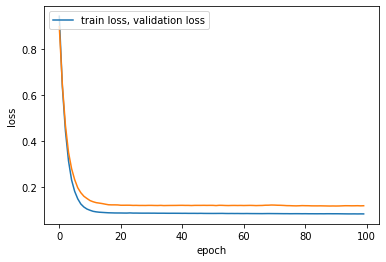

In [12]:
# Many-to-one LSTM 
from keras.models import Sequential
from keras.layers import LSTM, GRU
from keras.layers import Dense
from numpy import array  

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

######################################################################################################
model = Sequential()
model.add(GRU(10, input_shape = (3, 1)))           ## (3 GRU's cells , 1 feature) 
model.add(Dense(1))                                ##  output y 

model.compile(loss='mean_squared_error', optimizer='sgd')
print(model.summary())
########################################################################################################

history = model.fit(X_train, Y_train, validation_split = 0.1, epochs=100)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss, validation loss'], loc='upper left')
plt.show()

In [18]:
# Test model 
loss = model.evaluate(X_test, Y_test)
print(' loss: ', loss)

x_test = X_test[1]
x_test = x_test.reshape(1, 3, 1)
testPredict = model.predict(x_test)
print('input : ', x_test)
print('Predict output : ', testPredict.reshape(-1))
print('Actual Output: ', Y_test[1])

1/1 [==============================] - 0s 18ms/step - loss: 0.0890
 loss:  0.08901672065258026
input :  [[[0.98299898]
  [0.07344441]
  [0.04386263]]]
Predict output :  [0.6929723]
Actual Output:  0.17137028221693304


## One-to-Many RNN

In [30]:
def create_dataset(dataset, look_back, look_forward):
    dataX, dataY = [], []
    np.array(dataY)
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        if len(dataset[i + look_back:i+look_back+look_forward]) == look_forward:
            dataX.append(a)
            dataY.append(dataset[i + look_back:i+look_back+look_forward])
    return np.array(dataX), np.array(dataY)

##########################################################################################################
look_back = 1                                        #### time steps for X 
look_forward = 5                                     #### time steps for Y 

data = generate_sequence(100)
norm_data = normalize_data(data)

X, Y = create_dataset(norm_data, look_back, look_forward)  

X = X.reshape(95, 1, 1)

print('X\'s shape : ', X.shape, 'Y\'s shape : ', Y.shape)

X's shape :  (95, 1, 1) Y's shape :  (95, 5)


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_4 (GRU)                  (None, 10)                390       
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 55        
Total params: 445
Trainable params: 445
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
3/3 [==============================] - 2s 233ms/step - loss: 0.4262 - val_loss: 0.3757
Epoch 2/100
3/3 [==============================] - 0s 15ms/step - loss: 0.4141 - val_loss: 0.3651
Epoch 3/100
3/3 [==============================] - 0s 15ms/step - loss: 0.4025 - val_loss: 0.3549
Epoch 4/100
3/3 [==============================] - 0s 14ms/step - loss: 0.3912 - val_loss: 0.3449
Epoch 5/100
3/3 [==============================] - 0s 14ms/step - loss: 0.3803 - val_loss: 0.3356
Epoch 6/100
3/3 [=====

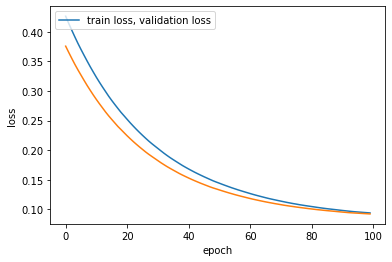

In [31]:
from keras.models import Sequential
from keras.layers import LSTM, GRU
from keras.layers import Dense
from numpy import array  

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

######################################################################################################
model = Sequential()
model.add(GRU(10, input_shape = (1, 1)))           ## (time step = 1 , feature = 1) 
model.add(Dense(5))                                ##  output y 

model.compile(loss='mean_squared_error', optimizer='sgd')
print(model.summary())
########################################################################################################

history = model.fit(X_train, Y_train, validation_split = 0.1, epochs=100)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss, val_loss'], loc='upper left')
plt.show()

In [32]:
x_test = X_test[1]
x_test = x_test.reshape(1, 1, 1)

testPredict = model.predict(x_test)
print('input : ', x_test)
print('Predict output : ', testPredict.reshape(-1))
print('Actual Output: ', Y_test[1])

input :  [[[0.87778552]]]
Predict output :  [0.37652576 0.37678432 0.41520366 0.37429613 0.43235084]
Actual Output:  [0.57729805 0.09714485 0.69150418 0.84749304 0.65355153]


# Many-to-Many RNN

In [36]:
def create_dataset(dataset, look_back, look_forward):
    dataX, dataY = [], []
    np.array(dataY)
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        if len(dataset[i + look_back:i+look_back+look_forward]) == look_forward:
            dataX.append(a)
            dataY.append(dataset[i + look_back:i+look_back+look_forward])
    return np.array(dataX), np.array(dataY)

##########################################################################################################
look_back = 2                                        #### time steps for X 
look_forward = 5                                     #### time steps for Y 

data = generate_sequence(100)
norm_data = normalize_data(data)

X, Y = create_dataset(norm_data, look_back, look_forward)  

X = X.reshape(94, 2, 1)
print('X\'s shape : ', X.shape, 'Y\'s shape : ', Y.shape)

X's shape :  (94, 2, 1) Y's shape :  (94, 5)


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_7 (GRU)                  (None, 10)                390       
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 5, 10)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 5, 10)             840       
_________________________________________________________________
time_distributed_1 (TimeDist (None, 5, 1)              11        
Total params: 1,241
Trainable params: 1,241
Non-trainable params: 0
_________________________________________________________________
None


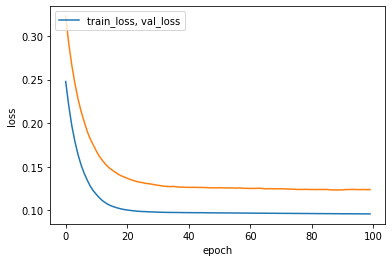

In [39]:
# Many-to-Many LSTM 
from keras.models import Sequential
from keras.layers import LSTM, GRU, RepeatVector, TimeDistributed
from keras.layers import Dense
from numpy import array  

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

######################################################################################################
model = Sequential()

model.add(GRU(10, input_shape=(2, 1)))         # encode layer 

model.add(RepeatVector(5))                     # repeat vector  

model.add(LSTM(10, return_sequences=True))     # decode layer 

model.add(TimeDistributed(Dense(1)))

model.compile(loss='mean_squared_error', optimizer='sgd')

print(model.summary())
########################################################################################################

history = model.fit(X_train, Y_train, validation_split = 0.1, epochs=100, verbose=0)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss, val_loss'], loc='upper left')
plt.show()

In [40]:
x_test = X_test[1]
x_test = x_test.reshape(1, 2, 1)

testPredict = model.predict(x_test)
print('input : ', x_test)
print('Predict output : ', testPredict.reshape(-1))
print('Actual Output: ', Y_test[1])

input :  [[[0.21489289]
  [0.25807548]]]
Predict output :  [0.3638235  0.41362894 0.44663447 0.46853822 0.4830976 ]
Actual Output:  [0.4083645  0.30873852 0.66575995 0.67460048 0.3199592 ]


# Stock price prediction using RNN 

In [1]:
!pip install yfinance                   ## install yahoo finance API

     |████████████████████████████████| 6.3 MB 8.2 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=e1d779139b9a1fa0bbf8cf1d86bcbb97866164b94b4738abdf1b116a3c90f4e5
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


## Retrive UREKA stock data  

In [77]:
import yfinance as yf 
from sklearn.preprocessing import MinMaxScaler

u= yf.Ticker('UREKA.BK')
stock_data = u.history(period="max", actions=False) 
stock_data

,Open,High,Low,Close,Volume
Date,,,,,
2013-03-01,2.868080,2.868080,2.783100,2.868080,117838764
2013-03-04,3.314226,3.356716,2.549405,2.570650,251703086
2013-03-05,2.613140,2.613140,2.209484,2.273219,46487210
2013-03-06,2.273219,2.400689,2.116006,2.145749,55903800
2013-03-07,2.166994,2.230729,2.116006,2.124504,17275108
...,...,...,...,...,...
2021-10-08,3.760000,3.960000,3.760000,3.780000,37383000
2021-10-11,3.860000,3.900000,3.780000,3.840000,19537900
2021-10-12,3.900000,4.000000,3.840000,3.920000,24821900


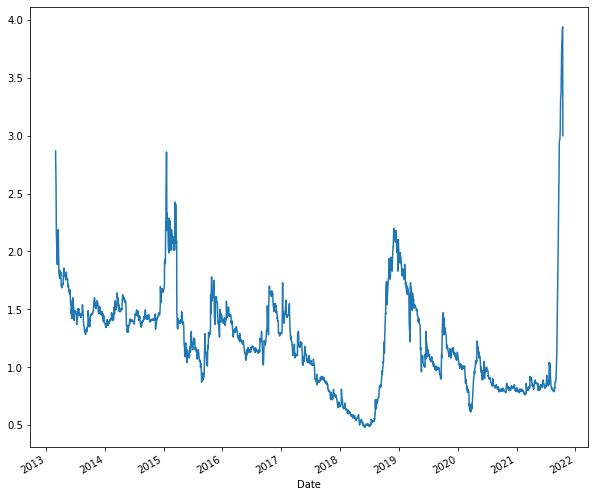

In [99]:
stock_data['Close'].plot(figsize=(10, 9))

## Many-to-One RNN using Close price   

In [96]:
def generate_dataset(timesteps, train, test):
    X_train = []
    Y_train = []
    X_val = []
    Y_val = []
    for i in range(timesteps,train.shape[0]):
        X_train.append(train[i-timesteps:i])
        Y_train.append(train[i][0])
    X_train,Y_train = np.array(X_train),np.array(Y_train)
  
    for i in range(timesteps,test.shape[0]):
        X_val.append(test[i-timesteps:i])
        Y_val.append(test[i][0])
    X_val,Y_val = np.array(X_val),np.array(Y_val)
    return X_train, Y_train, X_val, Y_val

sc = MinMaxScaler()
dataset = sc.fit_transform(stock_data['Close'].values.reshape(-1, 1))  ## normalize closed price data 

train = dataset[:2000]                    # split training data / test data 
test = dataset[2000:]

timestep = 10
X_train, Y_train, X_test, Y_test = generate_dataset(timestep, train, test)
print('train data : ', X_train.shape, Y_train.shape)
print('test_data : ' , X_test.shape, Y_test.shape)

train data :  (1990, 10, 1) (1990,)
test_data :  (90, 10, 1) (90,)


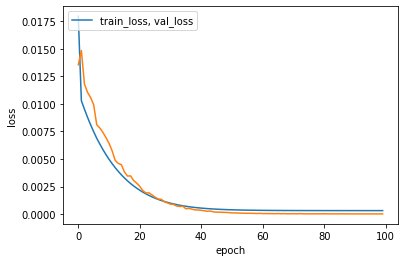

In [97]:
from keras.models import Sequential
from keras.layers import GRU
from keras.layers import Dense
import matplotlib.pyplot as plt 

model = Sequential()
model.add(GRU(50, input_shape = (10, 1)))          
model.add(Dense(1))                               

model.compile(loss='mean_squared_error', optimizer='sgd')

history = model.fit(X_train, Y_train, validation_split = 0.1, epochs=100, verbose=0)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss, val_loss'], loc='upper left')
plt.show()

## Model's evaluation 

 MSE :  0.0035318839645154866


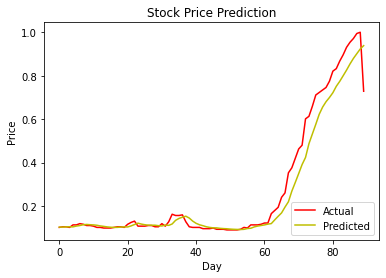

In [98]:
from sklearn.metrics import mean_squared_error

Y_hat = model.predict(X_test)                            

print(' MSE : ', mean_squared_error(Y_hat, Y_test))          ## compute mean sqaure error on test data 
plt.plot(Y_test,c = 'r')
plt.plot(Y_hat,c = 'y')
plt.xlabel('Day')
plt.ylabel('Closed Price')
plt.title("Stock Price Prediction")
plt.legend(['Actual','Predicted'],loc = 'lower right')
plt.show()

## Homework

1. Download airline passenger dataset from 
https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/airline/international-airline-passengers.csv

and then build many-to-one model to get the input number of passengers p(t-2),
p(t-1), p(t) and predict p(t+1)

 

In [62]:
import pandas as pd 

def create_dataset(dataset, time_step):                     ## Build training data X and Y   
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step)]        
        dataX.append(a)
        dataY.append(dataset[i + time_step])
    return np.array(dataX), np.array(dataY)

data = pd.read_csv('https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/airline/international-airline-passengers.csv')
data = data.dropna()                  ## remove n/a record
YY = data['International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60'].values

YY = YY / 1000.0
# norm_data = normalize_data(YY)
X, Y = create_dataset(norm_data, 2)

print(X.shape, Y.shape)

(141, 2) (141,)


In [63]:
X = X.reshape(141, 2, 1)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_11 (GRU)                 (None, 10)                390       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 11        
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
4/4 [==============================] - 3s 148ms/step - loss: 0.0564 - val_loss: 0.0695
Epoch 2/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0419 - val_loss: 0.0559
Epoch 3/100
4/4 [==============================] - 0s 10ms/step - loss: 0.0329 - val_loss: 0.0463
Epoch 4/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0269 - val_loss: 0.0404
Epoch 5/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0234 - val_loss: 0.0358
Epoch 6/100
4/4 [====

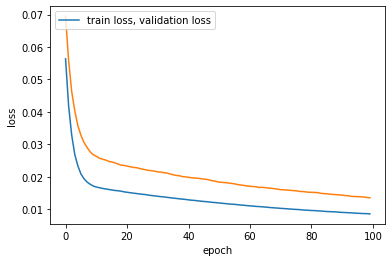

In [64]:
# Many-to-one LSTM 
from keras.models import Sequential
from keras.layers import LSTM, GRU
from keras.layers import Dense
from numpy import array  

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

######################################################################################################
model = Sequential()
model.add(GRU(10, input_shape = (2, 1)))           ## (3 GRU's cells , 1 feature) 
model.add(Dense(1))                                ##  output y 

model.compile(loss='mean_squared_error', optimizer='sgd')
print(model.summary())
########################################################################################################

history = model.fit(X_train, Y_train, validation_split = 0.1, epochs=100)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss, validation loss'], loc='upper left')
plt.show()

In [68]:
x_test = X_test[1]
x_test = x_test.reshape(1, 2, 1)

testPredict = model.predict(x_test)
print('input : ', x_test*1000)
print('Predict output : ', testPredict.reshape(-1)*1000)
print('Actual Output: ', Y_test[1]*1000)

input :  [[[498.06949807]
  [581.08108108]]]
Predict output :  [489.7979]
Actual Output:  604.2471042471043


2. From stock price prediction, modify the above code to predict the PPT's next-day closed price using the past 30 days of "open", "closed" and "volume".


In [ ]:
import numpy as np 

def generate_dataset(timesteps, train, test):
    X_train = []
    Y_train = []
    X_val = []
    Y_val = []
    for i in range(timesteps,train.shape[0]):
        X_train.append(train[i-timesteps:i])
        Y_train.append(train[i][3])
    X_train,Y_train = np.array(X_train),np.array(Y_train)
  
    for i in range(timesteps,test.shape[0]):
        X_val.append(test[i-timesteps:i])
        Y_val.append(test[i][0])
    X_val,Y_val = np.array(X_val),np.array(Y_val)
    return X_train, Y_train, X_val, Y_val

sc = MinMaxScaler()
dataset = sc.fit_transform(stock_data)
train = dataset[:2000]
test = dataset[2000:]

timesteps = 50

X_train, Y_train, X_test, Y_test = generate_dataset(50, train, test)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

In [ ]:
from keras.models import Sequential
from keras.layers import GRU
from keras.layers import Dense
import matplotlib.pyplot as plt 

model = Sequential()
model.add(GRU(50, input_shape = (50, 5)))          
model.add(Dense(1))                               

model.compile(loss='mean_squared_error', optimizer='sgd')
print(model.summary())

history = model.fit(X_train, Y_train, validation_split = 0.1, epochs=50, verbose=1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss, val_loss'], loc='upper left')
plt.show()

In [77]:
from sklearn.metrics import mean_squared_error

Y_hat = model.predict(X_test)

print(' MSE : ', mean_squared_error(Y_hat, Y_test))
plt.plot(Y_test,c = 'r')
plt.plot(Y_hat,c = 'y')
plt.xlabel('Day')
plt.ylabel('Price')
plt.title("Stock Price Prediction")
plt.legend(['Actual','Predicted'],loc = 'lower right')
plt.show()

array([1.44000006, 1.44000006, 1.45000005, 1.47000003, 1.46000004,
       1.42999995, 1.44000006, 1.45000005, 1.47000003, 1.44000006,
       1.45000005, 1.44000006, 1.42999995, 1.46000004, 1.44000006,
       1.41999996, 1.42999995, 1.40999997, 1.38999999, 1.35000002,
       1.38      , 1.37      , 1.33000004, 1.35000002, 1.38999999,
       1.40999997, 1.41999996, 1.38999999, 1.38      , 1.37      ,
       1.13999999, 1.01999998, 0.91000003, 0.85000002, 0.81      ,
       0.77999997, 0.81      , 0.76999998, 0.76999998, 0.81999999,
       0.80000001, 0.80000001, 0.77999997, 0.76999998, 0.76999998,
       0.88      , 0.99000001, 0.95999998, 0.93000001, 0.95999998,
       0.94999999, 0.95999998, 0.93000001, 0.92000002, 0.94      ,
       1.00999999, 1.        , 0.99000001, 1.00999999, 1.        ,
       0.97000003, 0.98000002, 0.98000002, 0.95999998, 0.91000003,
       0.92000002, 0.92000002, 0.88999999, 0.88      , 0.91000003,
       0.93000001, 0.92000002, 0.91000003, 0.89999998, 0.88   